In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = None

# Path names
rootPath = '/Users/darianng/Documents/Msc_Geography/Msc Thesis'
workPath = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code'
dataPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data'
saveFolder = '/Users/darianng/Documents/Msc_Geography/Msc Thesis'

def showAllKeys(data):
    # Showing data keys.
    print(f'--ALL DATA KEYS--\n')
    for key in data.keys():
        if isinstance(data[key],dict):
            print(f'Key: {key}\n       {list(data[key].keys())}')
            for subkey in data[key].keys():
                if isinstance(data[key][subkey],dict):
                    print(f'        keys:\n          {subkey}: {list(data[key][subkey].keys())}')
        else:
            print(f'Key: {key}')

Beginning resolution matching: /568
0%..8%..17%..26%..35%..44%..52%..61%..70%..79%..88%..96%..DONE
Confirming current Gas: ch4


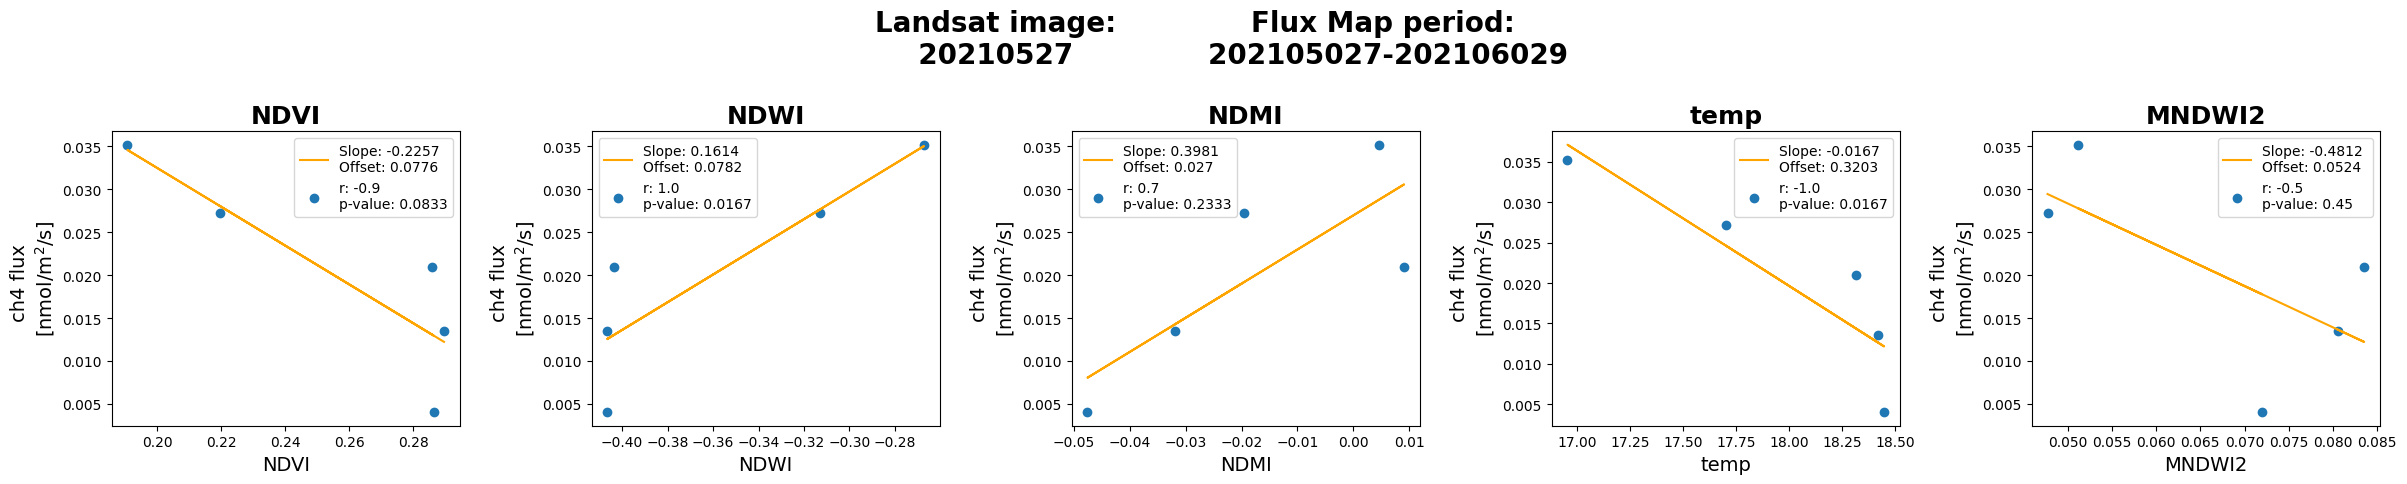

In [1]:
from thesis import preprocess_maps
from thesis import ffp_clustering
data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202105027-202106029',L8_date = 20210527)
data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)

Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster/Young_FFP=202105027-202106029_L8=20210527


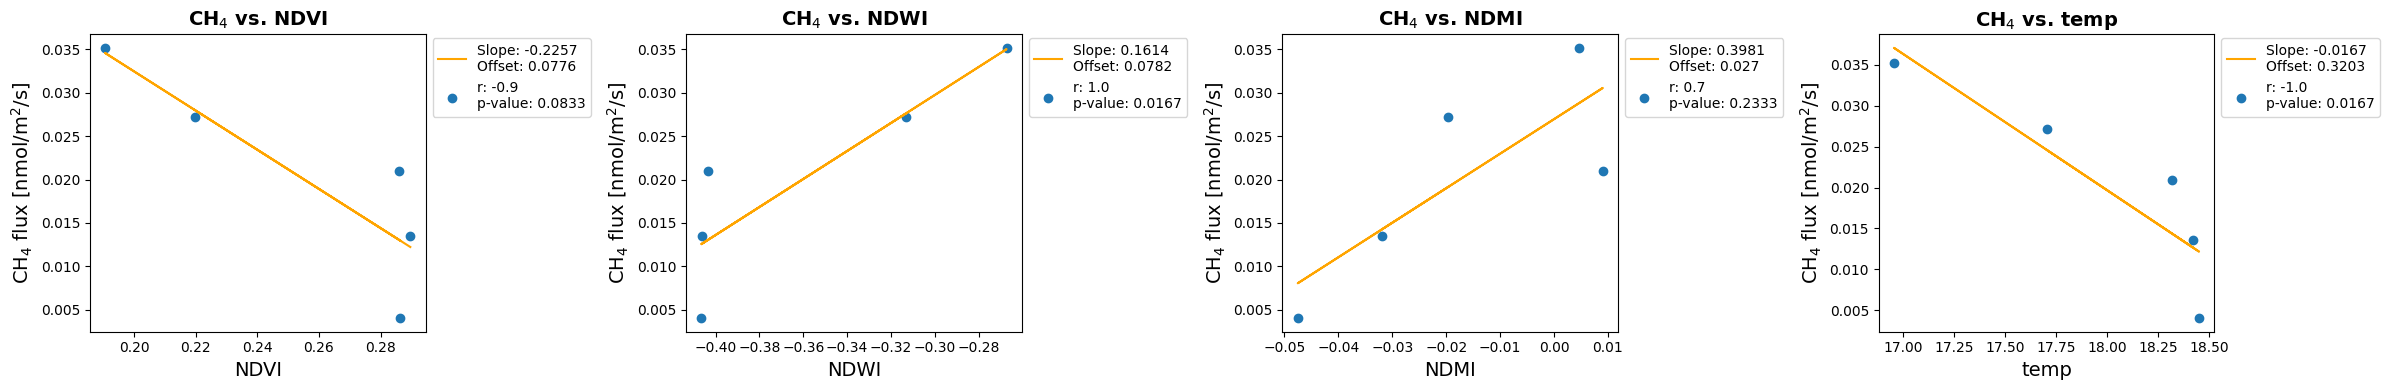

<Figure size 800x1500 with 0 Axes>

In [2]:
from thesis_setup import thesis_setup
from thesis import save_cluster
save_folder = thesis_setup('Young')[7]
fig1,data = save_cluster(data,save_folder)

In [5]:
# showAllKeys(data)